# Final Challenge Code:Nation Data Science
***

# Exploratory Data Analysis - Portfolio 2
***

> ## Purpose:
Understand portfolio data as well as its characteristics and correlations. In order to extract information relevant to the construction of a recommendation model.

***
> ## Packages:



In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.pylabtools import figsize

***
> ## Datasets:

In [2]:
market = pd.read_csv(r"../workspace/data/estaticos_market.csv")
portfolio_2 = pd.read_csv(r"../workspace/data/estaticos_portfolio2.csv")

***
> ## Shape: Rows x Columns:

In [3]:
print("(Rows, Columns) of portfolio 2 dataset:",portfolio_2.shape)

(Rows, Columns) of portfolio 2 dataset: (566, 2)


***
> ## Head view:

In [4]:
portfolio_2.head()

,Unnamed: 0,id
0,0,09e95c1a84049001d086470a8f320a19b076f955a89122...
1,1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...
2,2,16843c9ffb920170477118933798510d8d5f00f5c56c12...
3,3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...
4,4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...


***
> ## T1 - Completion of portfolio_2 dataset:
The dataset portifolio_2 has only the column 'id', we will complete with the other data that are present in the dataset market.

In [5]:
# Complete portfolio_2
portfolio_2_T1 = pd.DataFrame(portfolio_2['id'])
portfolio_2_T1 = pd.merge(portfolio_2_T1, market, on='id', how='left')

# Drop column Unnamed: 0 'which is redundant because it has value equal to index.
portfolio_2_T1 = portfolio_2_T1.drop(['Unnamed: 0'], axis = 1)

# Adjust for full view of dataframes:
pd.set_option('display.max_columns', len(portfolio_2_T1.columns))
pd.set_option('display.max_rows', len(portfolio_2_T1))

# Save new dataset:
# portfolio_2_T1.to_csv ('portfolio_2_T1.csv', index = False)

>> ### New Head:

In [6]:
portfolio_2_T1.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,True,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,11.243836,

>> ### New Shape: 

In [7]:
print("(Rows, Columns) of portfolio 2 dataset:",portfolio_2_T1.shape)

(Rows, Columns) of portfolio 2 dataset: (566, 181)


***
> ## Data Types:

In [8]:
data_types_portfolio_2_T1 = pd.DataFrame(portfolio_2_T1.dtypes).reset_index()
data_types_portfolio_2_T1.columns = ['Columns', 'Type']
data_types_portfolio_2_T1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
Columns,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_mac

>> ### Quantity by type:

In [9]:
data_types_portfolio_2_T1['Type'].value_counts()

float64    144
object      27
bool         9
int64        1
Name: Type, dtype: int64

***
> ## NA's

>> ### Number of columns with NA's:

In [10]:
qt_cols_na_portfolio_2_T1 = len(portfolio_2_T1.columns[portfolio_2_T1.isna().any()])
qt_cols_na_portfolio_2_T1

121

>> ### Number of columns without NA's:

In [11]:
qt_cols_wtt_na_portfolio_2_T1 = len(portfolio_2_T1.columns) - qt_cols_na_portfolio_2_T1
qt_cols_wtt_na_portfolio_2_T1

60

>> ### NA's count per column:

In [12]:
qt_na_per_col_portfolio_2_T1 = pd.DataFrame(portfolio_2_T1.isna().sum().sort_values(ascending=False).reset_index())
qt_na_per_col_portfolio_2_T1.columns = ['Columns', 'Qt_NA']
qt_na_per_col_portfolio_2_T1['Qt_not_NA'] = (len(portfolio_2_T1) - qt_na_per_col_portfolio_2_T1['Qt_NA'])
qt_na_per_col_portfolio_2_T1['Percentage_of_NA'] = ((qt_na_per_col_portfolio_2_T1['Qt_NA'] * 100) / len(portfolio_2_T1)).round(2)
qt_na_per_col_portfolio_2_T1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
Columns,grau_instrucao_macro_desconhecido,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,coligada_mais_nova_baixada,qt_socios_st_suspensa,vl_total_veiculos_antt,vl_total_veiculos_antt_grupo,vl_total_tancagem,vl_total_tancagem_grupo,qt_socios_pep,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_socios_pj_ativos,vl_potenc_cons_oleo_gas,grau_instrucao_macro_analfabeto,min_filiais_coligados,media_filiais_coligados,total_filiais_coligados,max_filiais_coligados,qt_socios_feminino,idade_ate_18,vl_folha_coligados,media_vl_folha_coligados,min_vl_folha_coligados,max_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,media_funcionarios_coligados_gp,qt_funcionarios_coligados_gp,qt_funcionarios_coligados,qt_art,max_faturamento_est_coligados_gp,min_faturamento_est_coligados,sum_faturamento_estimado_coligadas,faturamento_est_coligados,media_faturamento_est_coligados,min_faturamento_est_coligados_gp,max_faturamento_est_coligados,media_faturamento_est_coligados_gp,faturamento_est_coligados_gp,qt_coligados_atividade_inativo,qt_coligados_sa,qt_coligados_me,qt_coligados_ltda,qt_coligadas,coligada_mais_antiga_ativa,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,idade_media_coligadas_ativas,qt_coligados_suspensa,coligada_mais_nova_ativa,idade_minima_coligadas,idade_maxima_coligadas,idade_media_coligadas,qt_coligados_nula,qt_ufs_coligados,qt_coligados_inapta,qt_coligados_baixada,qt_coligados_ativo,qt_coligados_matriz,qt_socios_coligados,qt_coligados,qt_coligados_exterior,qt_coligados_mei,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_medio,qt_coligados_atividade_alto,qt_socios_masculino,qt_socios_st_regular,idade_minima_socios,idade_media_socios,idade_maxima_socios,qt_socios_pj,qt_socios,qt_socios_pf,de_indicador_telefone,vl_frota,idade_de_19_a_23,vl_total_veiculos_pesados,vl_total_veiculos_leves,empsetorcensitariofaixarendapopulacao,nm_micro_regiao,nm_meso_regiao,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,idade_de_54_a_58,grau_instrucao_macro_escolaridade_superior,idade_de_24_a_28,idade_de_49_a_53,idade_de_44_a_48,idade_de_29_a_33,grau_instrucao_macro_escolaridade_media,idade_de_39_a_43,tx_crescimento_24meses,tx_crescimento_12meses,idade_de_34_a_38,fl_telefone,fl_email,fl_ltda,nm_divisao,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_rm,nm_segmento,fl_mei,de_ramo,dt_situacao,fl_sa,fl_me,idade_emp_cat,idade_empresa_anos,setor,natureza_juridica_macro,fl_spa,sg_uf,de_natureza_juridica,fl_st_especial,fl_matriz,fl_veiculo,fl_antt,fl_epp,qt_filiais,fl_optante_simei,total,qt_funcionarios_24meses,qt_funcionarios_12meses,qt_funcionarios,min_meses_servicos,max_meses_servicos,media_meses_servicos,min_meses_servicos_all,max_meses_servicos_all,media_meses_servicos_all,qt_admitidos,qt_desligados,qt_de

>> ### NA Count by ID:

In [13]:
na_per_id_portfolio_2_T1 = portfolio_2_T1['id'].reset_index()
na_per_id_portfolio_2_T1 = na_per_id_portfolio_2_T1.drop(['index'], axis = 1)
na_per_id_portfolio_2_T1['qt_na'] = portfolio_2_T1.isnull().sum(axis=1)
na_per_id_portfolio_2_T1.head()

,id,qt_na
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,101
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...,99
2,16843c9ffb920170477118933798510d8d5f00f5c56c12...,91
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...,103
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...,25


>> ### Records with higher and lower number of NA's:

In [14]:
id_max_na = na_per_id_portfolio_2_T1.max()
id_min_na = na_per_id_portfolio_2_T1.min()

print("Record with higher number of NA's:\n", id_max_na)
print('\n','-'*58) # Linha
print("\nRecord with lower number of NA's:\n", id_min_na)

Record with higher number of NA's:
 id       ffeeb8d2494392dc868d636243d3f97ab607b9ca6e200a...
qt_na                                                  114
dtype: object

 ----------------------------------------------------------

Record with lower number of NA's:
 id       00990ce9e5ed028c985c70d79caf6bfafec0611deacee6...
qt_na                                                   13
dtype: object


***
> ## Values:

>> ### Unique Values:

In [15]:
qt_val_uni_portfolio_2_T1 = pd.DataFrame(portfolio_2_T1.nunique().sort_values(ascending=True).reset_index())
qt_val_uni_portfolio_2_T1.columns = ['Columns', 'qt_unique_values']
qt_val_uni_portfolio_2_T1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
Columns,qt_alteracao_socio_365d,qt_alteracao_socio_180d,qt_alteracao_socio_90d,qt_alteracao_socio_total,grau_instrucao_macro_desconhecido,qt_coligados_atividade_inativo,coligada_mais_nova_baixada,de_indicador_telefone,qt_coligados_atividade_baixo,qt_coligados_atividade_medio,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_atividade_alto,qt_coligados_nula,qt_coligados_epp,qt_coligados_suspensa,qt_coligados_me,de_saude_rescencia,fl_mei,fl_epp,qt_socios_pj_nulos,qt_socios_pj_inaptos,qt_socios_pj_suspensos,qt_socios_st_suspensa,fl_matriz,qt_coligados_atividade_mt_baixo,fl_optante_simei,qt_coligados_mei,qt_coligados_baixada,fl_simples_irregular,fl_passivel_iss,qt_socios_pj_baixados,fl_optante_simples,fl_me,fl_sa,fl_st_especial,fl_email,fl_telefone,fl_rm,fl_spa,fl_antt,fl_ltda,fl_veiculo,de_nivel_atividade,qt_socios_pj_ativos,idade_emp_cat,qt_coligados_inapta,qt_coligados_exterior,vl_total_veiculos_antt_grupo,qt_socios_pj,vl_total_veiculos_antt,natureza_juridica_macro,de_saude_tributaria,setor,qt_coligados_sul,qt_coligados_ltda,qt_regioes_coligados,sg_uf_matriz,de_faixa_faturamento_estimado,qt_coligados_agropecuaria,de_faixa_faturamento_estimado_grupo,qt_socios_pep,sg_uf,qt_socios_feminino,qt_coligados_centro,qt_socios_masculino,min_filiais_coligados,vl_total_tancagem,qt_coligados_industria,vl_total_tancagem_grupo,qt_ufs_coligados,qt_coligados_ccivil,nu_meses_rescencia,qt_socios_st_regular,qt_coligados_sa,qt_socios_pf,qt_coligados_comercio,idade_ate_18,qt_socios,qt_coligados_sudeste,grau_instrucao_macro_analfabeto,nm_meso_regiao,nm_segmento,qt_coligados_norte,qt_ramos_coligados,qt_coligados_nordeste,qt_coligados_serviço,de_natureza_juridica,de_ramo,max_filiais_coligados,qt_coligados_ativo,qt_coligados_matriz,qt_coligados,qt_coligadas,qt_filiais,total_filiais_coligados,qt_socios_coligados,qt_art,vl_idade_minima_socios_pj,media_filiais_coligados,vl_idade_maxima_socios_pj,vl_idade_media_socios_pj,vl_total_veiculos_leves,vl_total_veiculos_pesados,min_funcionarios_coligados_gp,nm_divisao,min_faturamento_est_coligados,vl_total_veiculos_leves_grupo,nm_micro_regiao,idade_minima_socios,idade_maxima_socios,vl_potenc_cons_oleo_gas,vl_total_veiculos_pesados_grupo,min_faturamento_est_coligados_gp,idade_de_19_a_23,min_vl_folha_coligados,idade_de_54_a_58,idade_acima_de_58,min_vl_folha_coligados_gp,idade_de_24_a_28,qt_desligados_12meses,idade_de_49_a_53,qt_admitidos_12meses,idade_de_44_a_48,idade_de_29_a_33,idade_de_39_a_43,idade_media_socios,idade_de_34_a_38,min_meses_servicos_all,grau_instrucao_macro_escolaridade_fundamental,max_funcionarios_coligados_gp,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_vl_folha_coligados,grau_instrucao_macro_escolaridade_superior,max_vl_folha_coligados_gp,max_faturamento_est_coligados,dt_situacao,vl_folha_coligados,media_vl_folha_coligados,meses_ultima_contratacaco,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_faturamento_est_coligados_gp,min_meses_servicos,media_faturamento_est_coligados,sum_faturamento_estimado_coligadas,faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,grau_instrucao_macro_escolaridade_media,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_maxima_coligadas,idade_media_coligadas_ativas,idade_media_coligadas,qt_funcionarios_12meses,qt_funcionarios,

>> ### Frequency of Unique Values:

In [16]:
freq_val_uni_portfolio_2_T1 = pd.DataFrame(portfolio_2_T1.drop(['id'], axis =1).apply(lambda x: [x.value_counts(dropna=False).to_dict()]).reset_index())
freq_val_uni_portfolio_2_T1.columns = ['Columns', 'Values']
freq_val_uni_portfolio_2_T1.head()

,Columns,Values
0,fl_matriz,[{True: 566}]
1,de_natureza_juridica,"[{'SOCIEDADE EMPRESARIA LIMITADA': 287, 'MUNIC..."
2,sg_uf,"[{'AM': 142, 'MA': 118, 'PI': 101, 'RN': 100, ..."
3,natureza_juridica_macro,"[{'ENTIDADES EMPRESARIAIS': 323, 'OUTROS': 152..."
4,de_ramo,"[{'ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE ..."


>> ### Mode: 

In [17]:
mode_portfolio_2_T1 = portfolio_2_T1.mode(dropna=False)
mode_portfolio_2_T1 = pd.DataFrame(mode_portfolio_2_T1.iloc[0]).reset_index()
mode_portfolio_2_T1.columns = ['Columns', 'value_mode']

freq_mode = pd.DataFrame(portfolio_2_T1.apply(lambda x: [x.value_counts(dropna=False).nlargest(n=1).values[0]]).reset_index())
freq_mode.columns = ['Columns', 'Qtd']

mode_portfolio_2_T1['Freq_value_mode'] = freq_mode['Qtd']
mode_portfolio_2_T1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
Columns,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_mac

***
> ## Sample Fill:

In [18]:
sample_portfolio_2_T1 = portfolio_2_T1.mode()
sample_portfolio_2_T1 = pd.DataFrame(sample_portfolio_2_T1.iloc[0]).reset_index()
sample_portfolio_2_T1.columns = ['Columns', 'sample_values']
sample_portfolio_2_T1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
Columns,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_mac

***
> ## Description of the data:

In [19]:
from functools import reduce
dfs = [data_types_portfolio_2_T1, qt_na_per_col_portfolio_2_T1, qt_val_uni_portfolio_2_T1, sample_portfolio_2_T1, mode_portfolio_2_T1]
Description_portfolio_2_T1 = reduce(lambda  left,right: pd.merge(left,right,on=['Columns'], how='outer'), dfs)
Description_portfolio_2_T1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
Columns,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_mac

>> ### Describe Function:

In [20]:
describe_portfolio_2_T1 = portfolio_2_T1.describe().reset_index()
describe_portfolio_2_T1 = describe_portfolio_2_T1.rename(index=str, columns={"index": "Columns"})
describe_portfolio_2_T1

,Columns,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,count,566.000000,27.000000,5.00000,490.000000,490.000000,262.000000,566.000000,566.000000,30.000000,5.00000,94.000000,566.000000,4.680000e+02,496.000000,382.000000,382.000000,382.000000,353.000000,353.000000,353.000000,352.000000,1.0,310.000000,197.000000,32.000000,0.0,0.0,0.0,0.0,51.000000,51.0,51.000000,51.0,51.0,51.000000,51.000000,51.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.0,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,1.0,1.0,1.0,299.000000,299.0,299.000000,299.000000,299.0,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.0000

>> ### Info function:

In [21]:
portfolio_2_T1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 565
Columns: 181 entries, id to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(27)
memory usage: 770.0+ KB


***
> ## Data Visualization:

>> ### Graphics:

In [22]:
# Variable Adjustment:
portfolio_2_T1['idade_empresa_anos'] = portfolio_2_T1['idade_empresa_anos'].round().astype(int)


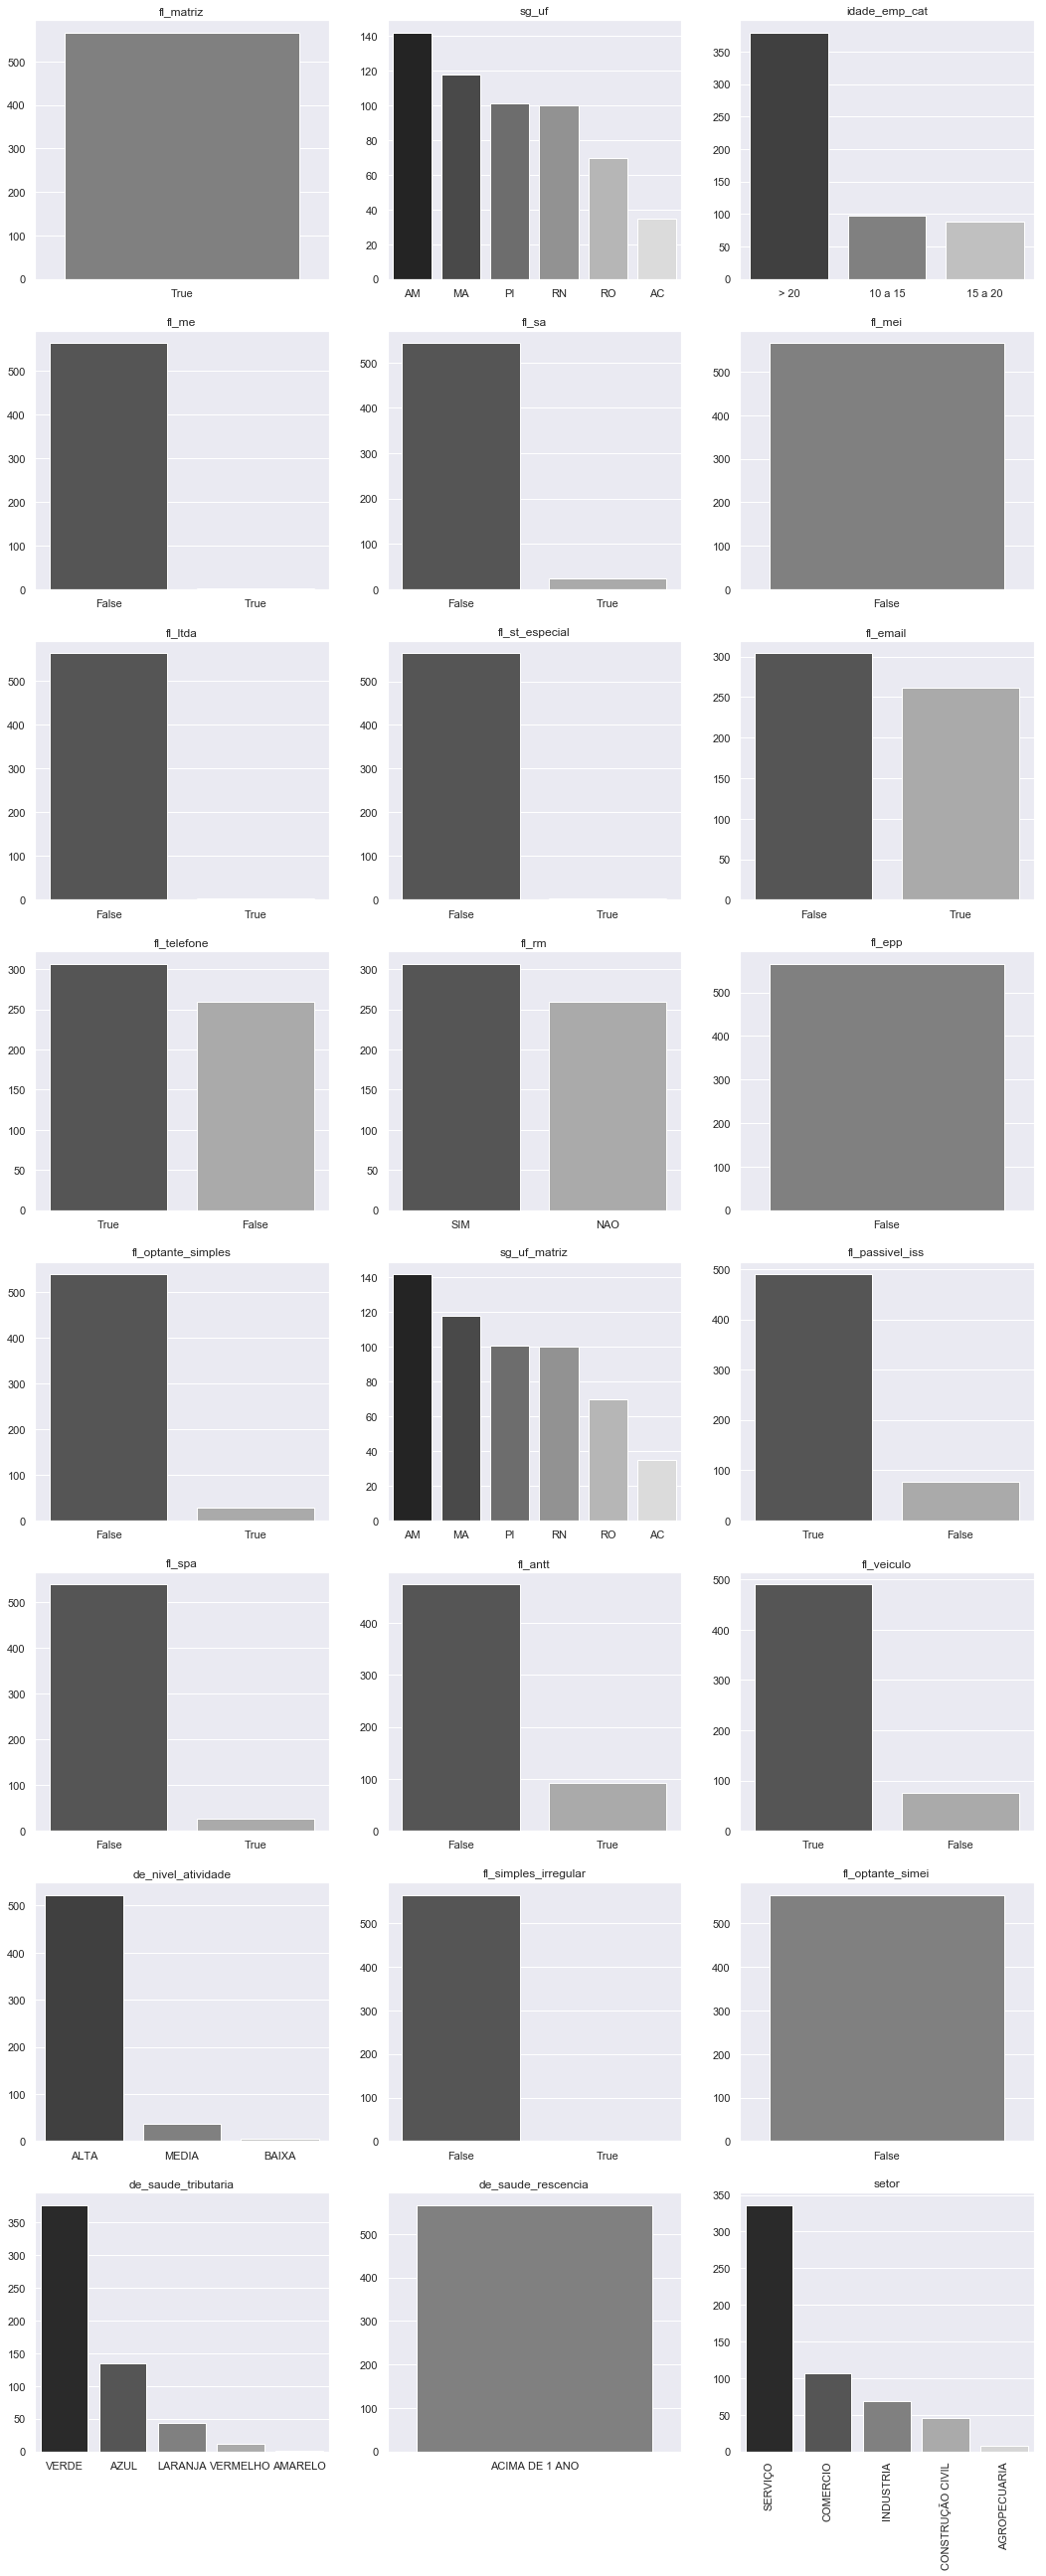

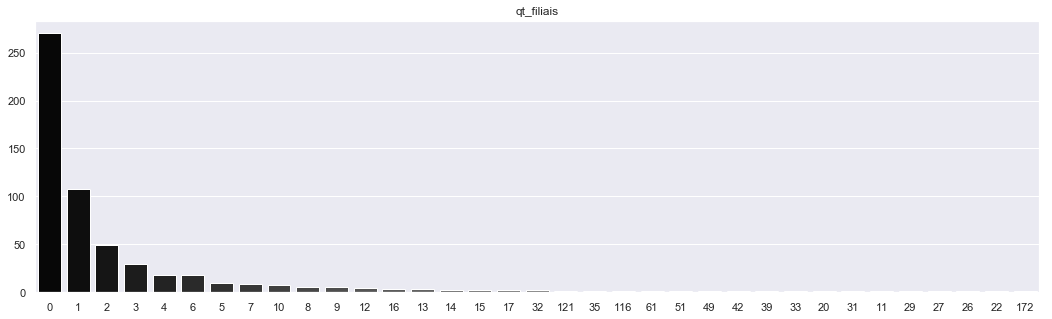

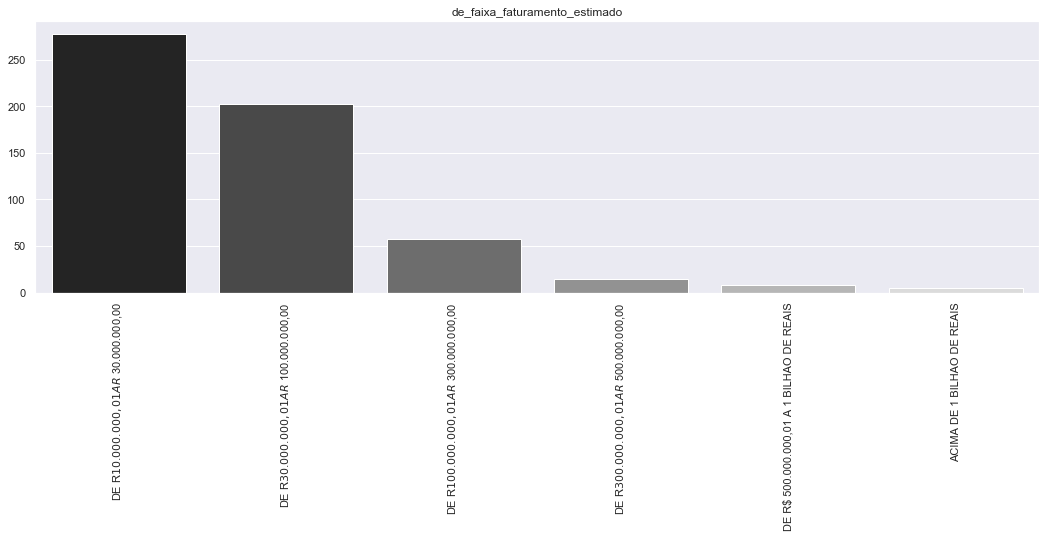

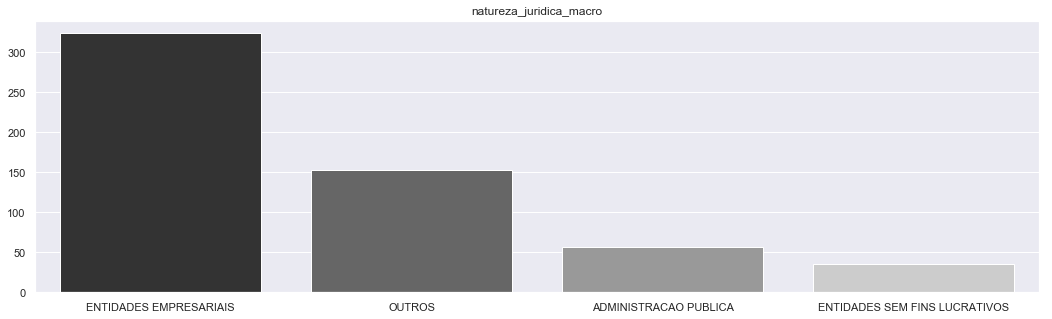

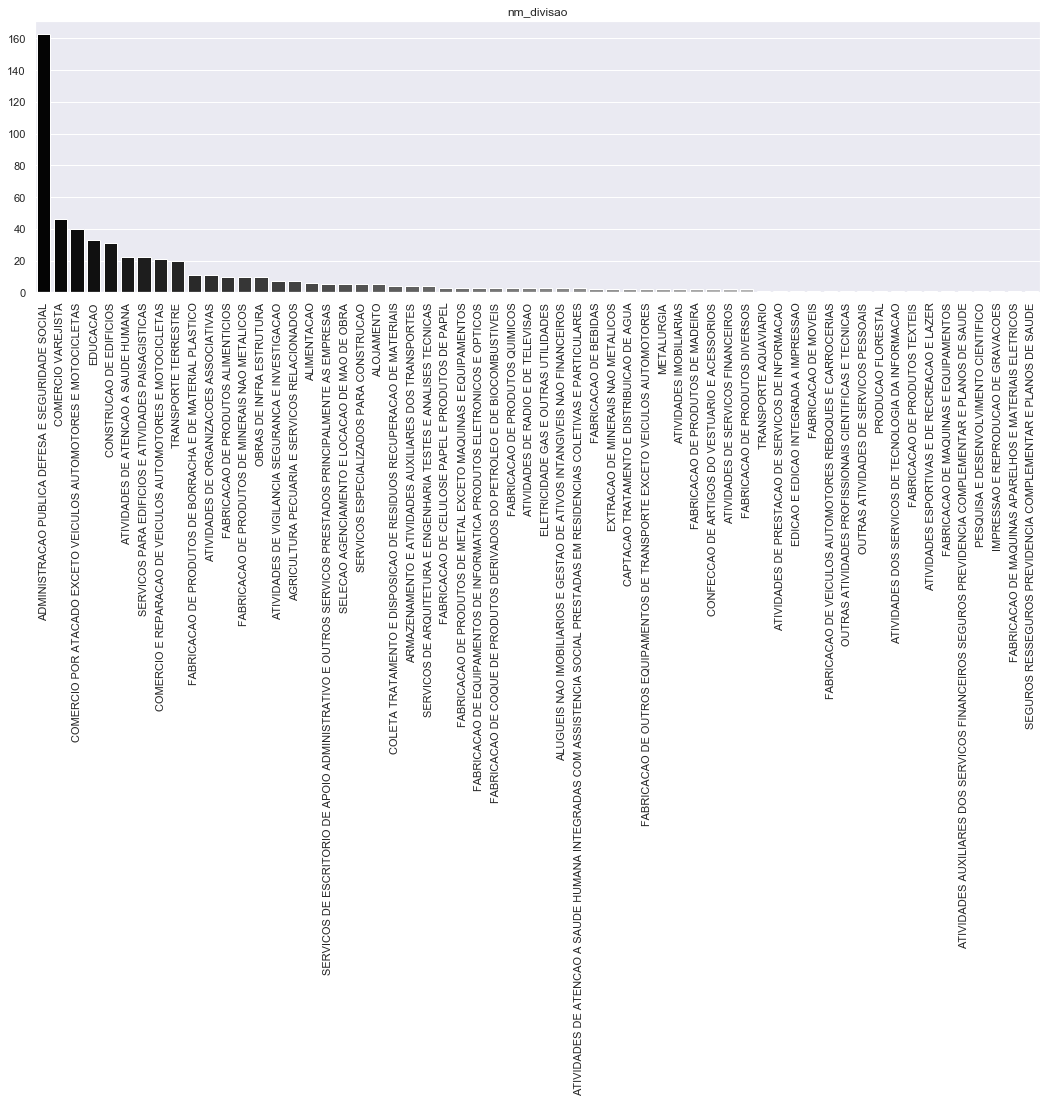

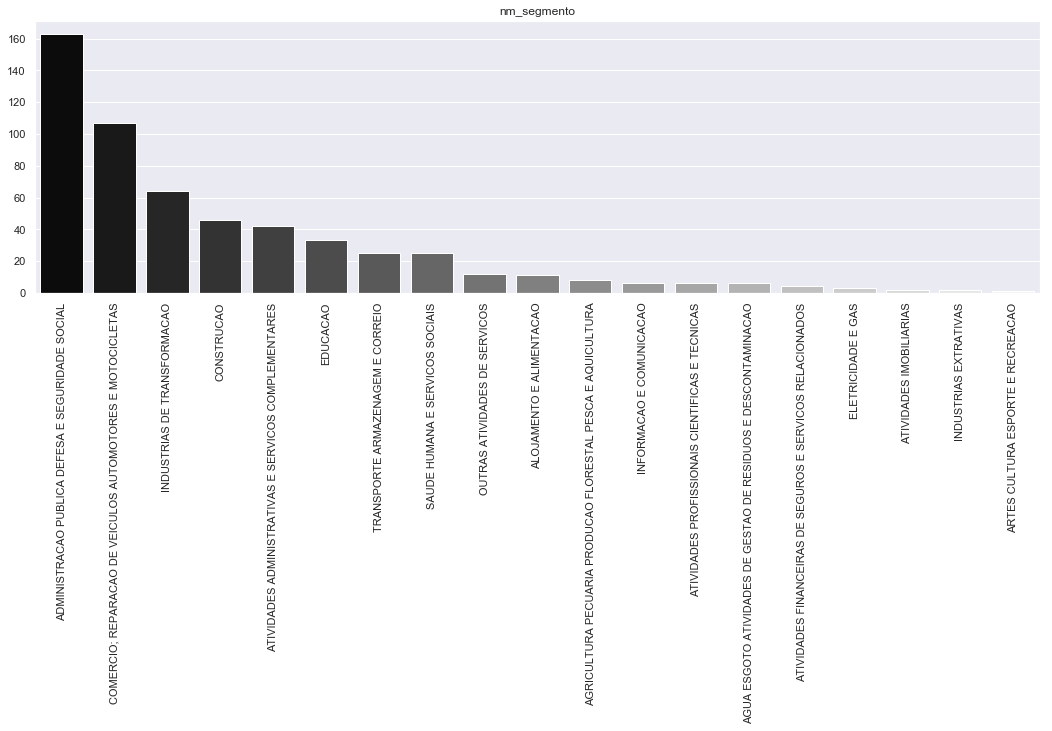

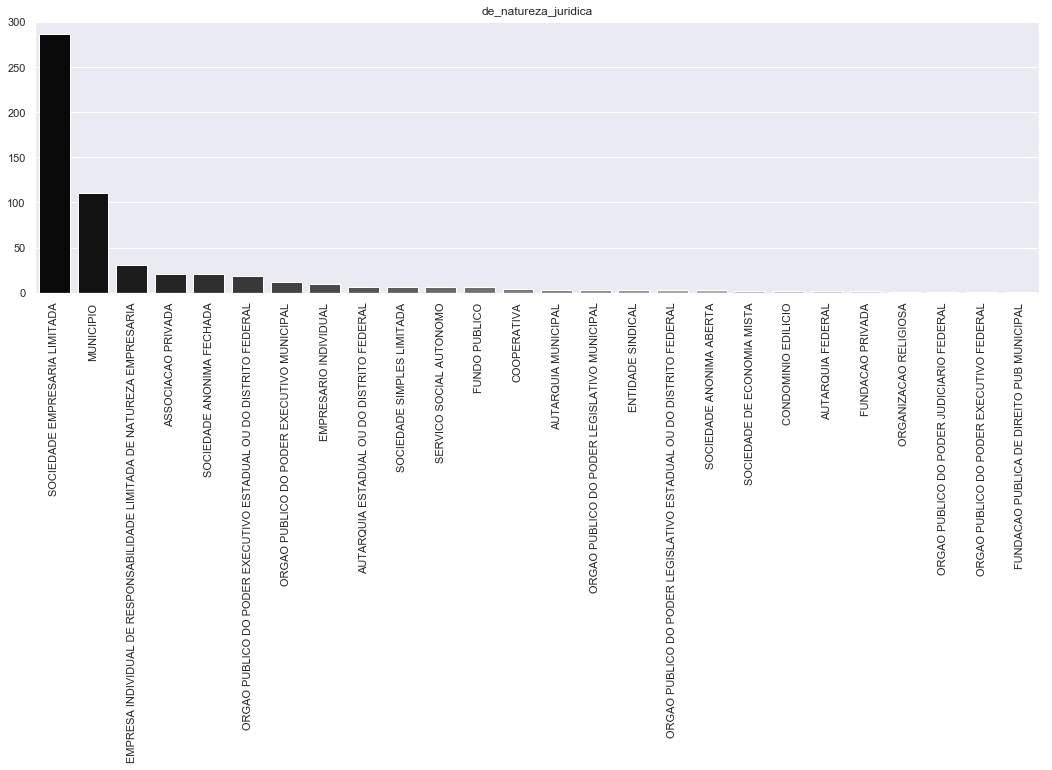

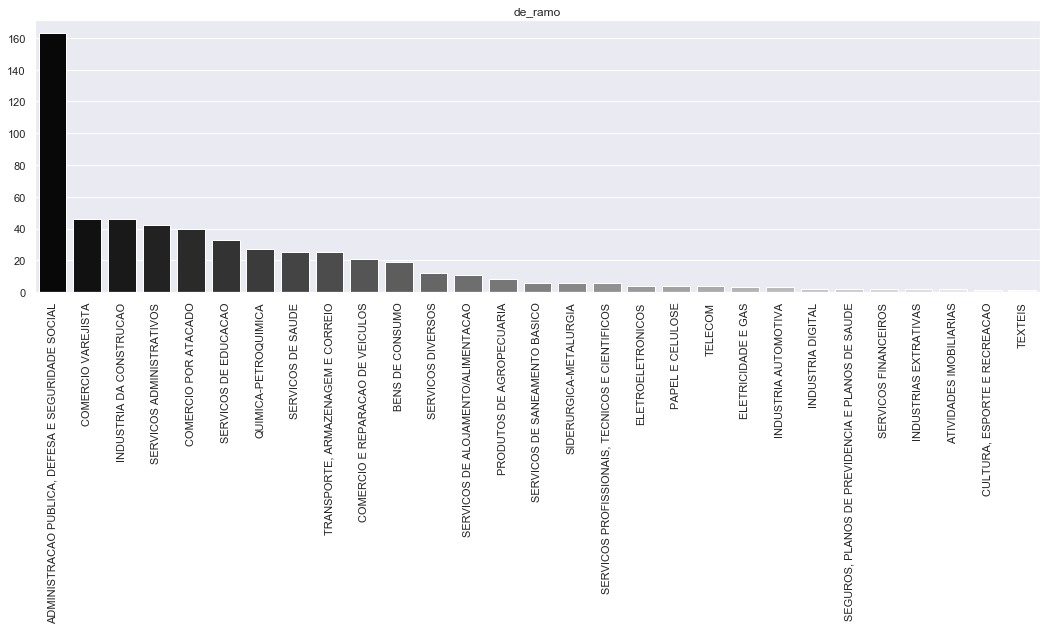

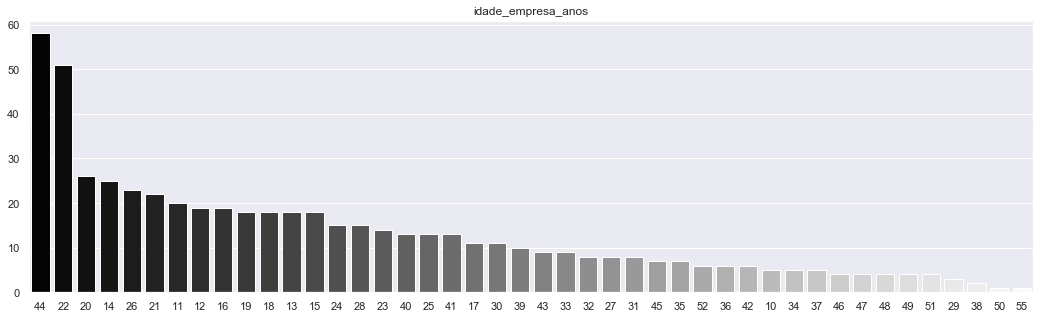

In [23]:
sns.set()
f, axes= plt.subplots(8, 3, figsize=(18, 45))

sns.countplot(data=portfolio_2_T1, x="fl_matriz", palette = 'gist_gray', order = portfolio_2_T1['fl_matriz'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("fl_matriz")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="sg_uf", palette = 'gist_gray', order = portfolio_2_T1['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_2_T1['idade_emp_cat'].value_counts().index, ax=axes[0,2]);
axes[0,2].set_title("idade_emp_cat")
axes[0,2].set_ylabel("")
axes[0,2].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_me", palette = 'gist_gray', order = portfolio_2_T1['fl_me'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("fl_me")
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_sa", palette = 'gist_gray', order = portfolio_2_T1['fl_sa'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("fl_sa")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_mei", palette = 'gist_gray', order = portfolio_2_T1['fl_mei'].value_counts().index, ax=axes[1,2]);
axes[1,2].set_title("fl_mei")
axes[1,2].set_ylabel("")
axes[1,2].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_ltda", palette = 'gist_gray', order = portfolio_2_T1['fl_ltda'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("fl_ltda")
axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_st_especial", palette = 'gist_gray', order = portfolio_2_T1['fl_st_especial'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("fl_st_especial")
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_email", palette = 'gist_gray', order = portfolio_2_T1['fl_email'].value_counts().index, ax=axes[2,2]);
axes[2,2].set_title("fl_email")
axes[2,2].set_ylabel("")
axes[2,2].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_telefone", palette = 'gist_gray', order = portfolio_2_T1['fl_telefone'].value_counts().index, ax=axes[3,0]);
axes[3,0].set_title("fl_telefone")
axes[3,0].set_ylabel("")
axes[3,0].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_rm", palette = 'gist_gray', order = portfolio_2_T1['fl_rm'].value_counts().index, ax=axes[3,1]);
axes[3,1].set_title("fl_rm")
axes[3,1].set_ylabel("")
axes[3,1].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_epp", palette = 'gist_gray', order = portfolio_2_T1['fl_epp'].value_counts().index, ax=axes[3,2]);
axes[3,2].set_title("fl_epp")
axes[3,2].set_ylabel("")
axes[3,2].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_optante_simples", palette = 'gist_gray', order = portfolio_2_T1['fl_optante_simples'].value_counts().index, ax=axes[4,0]);
axes[4,0].set_title("fl_optante_simples")
axes[4,0].set_ylabel("")
axes[4,0].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="sg_uf_matriz", palette = 'gist_gray', order = portfolio_2_T1['sg_uf_matriz'].value_counts().index, ax=axes[4,1]);
plt.xticks(rotation=90)
axes[4,1].set_title("sg_uf_matriz")
axes[4,1].set_ylabel("")
axes[4,1].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_passivel_iss", palette = 'gist_gray', order = portfolio_2_T1['fl_passivel_iss'].value_counts().index, ax=axes[4,2]);
axes[4,2].set_title("fl_passivel_iss")
axes[4,2].set_ylabel("")
axes[4,2].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_spa", palette = 'gist_gray', order = portfolio_2_T1['fl_spa'].value_counts().index, ax=axes[5,0]);
axes[5,0].set_title("fl_spa")
axes[5,0].set_ylabel("")
axes[5,0].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_antt", palette = 'gist_gray', order = portfolio_2_T1['fl_antt'].value_counts().index, ax=axes[5,1]);
axes[5,1].set_title("fl_antt")
axes[5,1].set_ylabel("")
axes[5,1].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_veiculo", palette = 'gist_gray', order = portfolio_2_T1['fl_veiculo'].value_counts().index, ax=axes[5,2]);
axes[5,2].set_title("fl_veiculo")
axes[5,2].set_ylabel("")
axes[5,2].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="de_nivel_atividade", palette = 'gist_gray', order = portfolio_2_T1['de_nivel_atividade'].value_counts().index, ax=axes[6,0]);
axes[6,0].set_title("de_nivel_atividade")
axes[6,0].set_ylabel("")
axes[6,0].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_simples_irregular", palette = 'gist_gray', order = portfolio_2_T1['fl_simples_irregular'].value_counts().index, ax=axes[6,1]);
axes[6,1].set_title("fl_simples_irregular")
axes[6,1].set_ylabel("")
axes[6,1].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="fl_optante_simei", palette = 'gist_gray', order = portfolio_2_T1['fl_optante_simei'].value_counts().index, ax=axes[6,2]);
axes[6,2].set_title("fl_optante_simei")
axes[6,2].set_ylabel("")
axes[6,2].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="de_saude_tributaria", palette = 'gist_gray', order = portfolio_2_T1['de_saude_tributaria'].value_counts().index, ax=axes[7,0]);
axes[7,0].set_title("de_saude_tributaria")
axes[7,0].set_ylabel("")
axes[7,0].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="de_saude_rescencia", palette = 'gist_gray', order = portfolio_2_T1['de_saude_rescencia'].value_counts().index, ax=axes[7,1]);
axes[7,1].set_title("de_saude_rescencia")
axes[7,1].set_ylabel("")
axes[7,1].set_xlabel("")

sns.countplot(data=portfolio_2_T1, x="setor", palette = 'gist_gray', order = portfolio_2_T1['setor'].value_counts().index, ax=axes[7,2]);
axes[7,2].set_title("setor")
axes[7,2].set_ylabel("")
axes[7,2].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T1, x="qt_filiais", palette = 'gist_gray', order = portfolio_2_T1['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T1, x="de_faixa_faturamento_estimado", palette = 'gist_gray', order = portfolio_2_T1['de_faixa_faturamento_estimado'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T1, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_2_T1['natureza_juridica_macro'].value_counts().index);
ax.set_title("natureza_juridica_macro")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T1, x="nm_divisao", palette = 'gist_gray', order = portfolio_2_T1['nm_divisao'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_divisao")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T1, x="nm_segmento", palette = 'gist_gray', order = portfolio_2_T1['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T1, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_2_T1['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica")
ax.set_ylabel("")
ax.set_xlabel("")


fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T1, x="de_ramo", palette = 'gist_gray', order = portfolio_2_T1['de_ramo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_ramo")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_2_T1, x="idade_empresa_anos", palette = 'gist_gray', order = portfolio_2_T1['idade_empresa_anos'].value_counts().index);
ax.set_title("idade_empresa_anos")
ax.set_ylabel("")
ax.set_xlabel("")

plt.show()

***
> ## Overview about Company 2's clients:

- Customers provide at least 60 data (already counting with the id);
- They have 10 years or more of market, most of them have more than 20;
- Most are from the service sector, but there are also commerce, industry, construction and agro;
- Have revenues over 10 million reais;
- Varied legal nature, but most are LTDA companies, followed by municipalities and public agencies;
- Various fields of activity but the main one is public administration, defense and social security;
- The data 'fl_matriz' always has a value of 'True', which indicates that all customers are from parent companies;
- The data 'fl_mei', 'fl_epp' and fl_optante_simei always have a value of 'False'. This means that there are no single microenterprise and small business customers;
- fl_st_especial has two True values, ie two clients are in extraordinary court status;
- Most customers have vehicle fleet;
- 11 clients are in poor tax health ('vermelho' value in 'de_saude_tributaria');
- 1 customer has irregular 'situação simples';
- 6 clients are unlikely to be operating;
- 32 clients have politically exposed partners.

***